In [33]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu
import nltk

np.set_printoptions(precision=2, linewidth=80)

In [2]:
# dataset = pd.read_csv('Dataset/3/data.csv')
train = pd.read_csv('Dataset/4/train.csv')
test=   pd.read_csv('Dataset/4/test.csv')

print(train.head(5))
# print(test.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [3]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.colors import Color
sns.set_style('whitegrid')
import scattertext as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import re
print(f're: {re.__version__}')
import spacy
print(f'spaCy: {spacy.__version__}')
import nltk
print(f'nltk: {nltk.__version__}')
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import yaml
from spacymoji import Emoji
from collections import Counter
from tqdm.notebook import tqdm
tqdm().pandas() 

Versions
Pandas: 1.4.1
Numpy: 1.22.3
re: 2.2.1
spaCy: 3.2.4
nltk: 3.7


0it [00:00, ?it/s]

In [4]:
inbound=train['tweet']

In [5]:
nlp = spacy.load('en_core_web_sm')
emoji = Emoji(nlp, merge_spans=False)
nlp.add_pipe("emoji", first=True)
print(nlp.pipe_names)
emojis = []
for doc in tqdm(nlp.pipe(inbound, batch_size=512)):
    if doc._.has_emoji:
        for e in doc._.emoji:
            emojis.extend(e[0])


emoji_count = Counter(emojis)
emoji_count.most_common(30)

['emoji', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


0it [00:00, ?it/s]

[('©', 207), ('®', 98)]

In [6]:
unique_emojis = [i[0] for i in emoji_count]

plotted_emojis = [i[0] for i in emoji_count.most_common(30)]
plotted_emojis = plotted_emojis[:3] + plotted_emojis[5:]
counts = [i[1] for i in emoji_count.most_common(30)]
counts = counts[:3] + counts[5:]


p = figure(x_range=plotted_emojis, plot_height=600, plot_width = 1300, title="Emoji Counts",
           toolbar_location=None, tools="")
p.vbar(x=plotted_emojis, top=counts, width=0.9, color = "#FBD043")
p.xgrid.grid_line_color = None
p.y_range.start = 0



In [7]:

import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import spacy_fastlang
def get_lang_detector(nlp, name):
    return LanguageDetector()

punct_base = ['?']


puncts = ['\u200d','?', '....','..','...','','@','#', ',', '.', '"', ':', ')', '(', '-', '!', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '*', '+', '\\', 
    '•', '~', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', 
    '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', 
    '—', '‹', '─', '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 
    'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
    '¹', '≤', '‡', '√', '!','🅰','🅱']


stopwords.words('english');
stop_words = set(stopwords.words('english')) 


contraction_colloq_dict = {"btw": "by the way", "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have"}


lemmatizer = nltk.stem.WordNetLemmatizer()

import emoji 


try:

    nlp_cld = spacy.load('en_core_web_sm',disable=["tagger","ner","lemmatizer"])


    nlp_cld.add_pipe("language_detector")
except ValueError as e:
    print("The spaCy function was run more than once, but that's okay because it means it was initialized!")

In [8]:
def visualize_lengths(data,title):
    '''Visualizing lengths of tokens in each tweet'''
    lengths = [len(i) for i in data]
    plt.figure(figsize=(13,6))
    plt.hist(lengths, bins = 40)
    plt.title(title)
    plt.show()
    
def remove_from_list(x, stuff_to_remove) -> list:
        ''' Making a function to remove a list of items from a list'''
        for item in stuff_to_remove:
           
            for i,token in enumerate(x):
                if item == token:
                    del x[i]
        return x
    
def remove_links(doc):
    return [re.sub(r'^https?:\/\/.*[\r\n]*', '', token, flags=re.MULTILINE) for token in doc]

def correct_spellings(x):
    ''' Takes as input a list and outputs a list of the corrected spelling'''
    corrected_text = []
    for word in x:
        if word in x:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return corrected_text

def replace_from_dict(x,dic):
    ''' Making a function to replace all the items in a list based on a dictionary. I made sure to use the insert
            method to insert the longer-gram replacement as distinct items in the list at that specific index'''
    replaced_counter = 0
    for item in dic.items():
        for i, e in enumerate(x):
            if e == item[0]:
                replaced_counter+=1
       
                del x[i]
                for ix, token in enumerate(item[1].split()):
                    x.insert(i+ix,token)

    return x    

def only_english(x):
    ''' Making a function that only accepts English by appending True if it is English and False otherwise 
            into a mask. Returns a mask'''    
    mask = []
    x = x.apply(" ".join)
    try:
        for i,doc in tqdm(enumerate(nlp_cld.pipe(x, batch_size=512))):

            if 'en' not in doc._.language or len(doc._.language) < 1:
                mask.append(False)
            else:
                mask.append(True)
    except Exception as e:
        print(f"Exception:{e}")
    return mask

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
    
def lemmatize_list(x):
    ''' This lemmatizer function should work on a single list of tokenized data'''

    x = " ".join(x)

    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]

def extract_emojis(s):
        return [c for c in s if c not in emoji.UNICODE_EMOJI]

def limit_length(x, max_tokens, min_tokens):
    ''' Inputs a list and drops it out of the document if 
        the document has more than the max and less than the min'''
    output = x
    if len(x) > max_tokens:
        output = np.nan
    if len(x) <= min_tokens:
        output = np.nan
    return output

def clean_numbers(x):
    for i,j in enumerate(x):
        if bool(re.search(r'\d', j)):
            del x[i]
    return x

def validate(func, locals):
    ''' Validating a function below to accept correct input'''
    for var, test in func.__annotations__.items():
        value = locals[var]
        try: 
            pr=test.__name__+': '+test.__docstring__
        except AttributeError:
            pr=test.__name__   
        msg = '{}=={}; Test: {}'.format(var, value, pr)
        assert test(value), msg



def my_tokenizer(data: lambda _data: isinstance(_data, pd.Series)):
    ''' I am making my own end-to-end tokenizer function for preprocessing that accepts
    a Pandas Series as input and outputs a preprocessed Pandas Series'''
    

    assert isinstance(data,pd.Series), 'Input must be a Pandas Series'

    

    data = data.str.lower()
    
    print(f'1. Original shape of data is {data.shape}')
    

    tknzr = TweetTokenizer(strip_handles = True, reduce_len = True)

    data = data.progress_apply(tknzr.tokenize)
    
    print(f'2. Tokenized, removed handles, and reduced the length of repeated characters.\
          \n Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 2')
    

    
    data = data.progress_apply(remove_from_list, stuff_to_remove = puncts)
    print(f'3. Removed empty tokens and punctuation. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 9')
    

    
    data = data.progress_apply(remove_links)
    
    print(f'3. Removed the links. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 3')

    spell = SpellChecker()

    
    print(f'4. Applied automispelling corrections. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    
    

    
    data = data.progress_apply(remove_from_list, stuff_to_remove = stop_words)
    
    print(f'5. Removed the stop words. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 4')
    

    
    data = data.progress_apply(replace_from_dict, dic = contraction_colloq_dict)
    print(f'6. Expanded contractions into extra tokens. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 5')
    

    data = data[only_english(data)]
    print(f'7. Remove all non-english Tweets. Shape is now {data.shape}. Clearly less than before! \n \n Peek: \n {data.head()}')
    


    data = data.progress_apply(lemmatize_list)
    print(f'8. Lemmatized the tokens. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 8')   
   

    data = data.progress_apply(remove_from_list, stuff_to_remove = puncts)


    
    unique_emojis = [i[0] for i in emoji.UNICODE_EMOJI]
    data = data.apply(remove_from_list, stuff_to_remove = unique_emojis)

    data = data.progress_apply(clean_numbers)
    
    print(f'9. Removed emojis and numbers. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 9')   
    

    max_tokens = 50
    min_tokens = 1
    data = data.progress_apply(limit_length, min_tokens = min_tokens, max_tokens = max_tokens)

    data = data.dropna()
    print(f'10. Limited each tweet to a max of {max_tokens} tokens and a min of {min_tokens} tokens. Shape is now {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 10')
    
    return data
    

1. Original shape of data is (31962,)


  0%|          | 0/31962 [00:00<?, ?it/s]

2. Tokenized, removed handles, and reduced the length of repeated characters.          
 Shape is still (31962,). 
 
 Peek: 
 0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4           [factsguide, :, society, now, #motivation]
Name: tweet, dtype: object


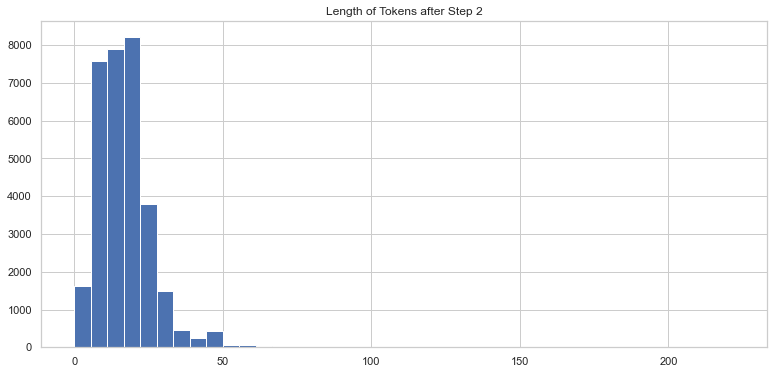

  0%|          | 0/31962 [00:00<?, ?it/s]

3. Removed empty tokens and punctuation. Shape is still (31962,). 
 
 Peek: 
 0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: tweet, dtype: object


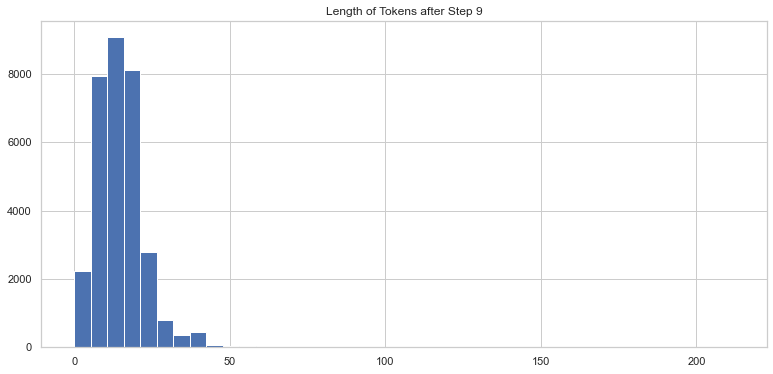

  0%|          | 0/31962 [00:00<?, ?it/s]

3. Removed the links. Shape is still (31962,). 
 
 Peek: 
 0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: tweet, dtype: object


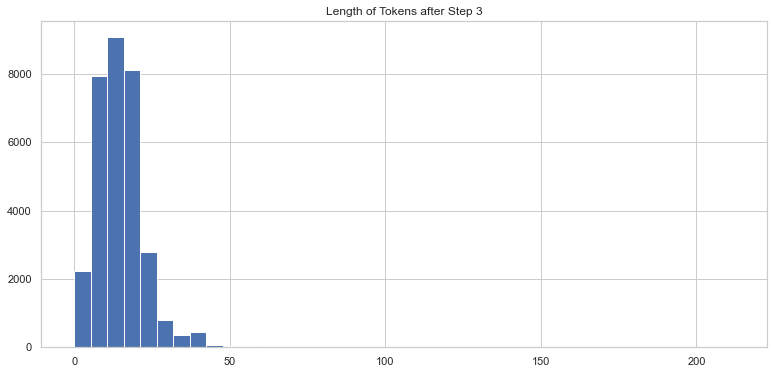

4. Applied automispelling corrections. Shape is still (31962,). 
 
 Peek: 
 0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: tweet, dtype: object


  0%|          | 0/31962 [00:00<?, ?it/s]

5. Removed the stop words. Shape is still (31962,). 
 
 Peek: 
 0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, can't, use, cause, off...
2                                    [bihday, majesty]
3    [#model, love, u, take, u, time, urð, , , ð,...
4                   [factsguide, society, #motivation]
Name: tweet, dtype: object


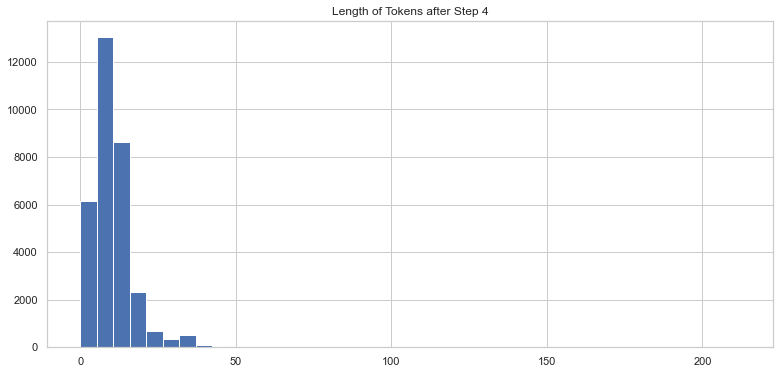

  0%|          | 0/31962 [00:00<?, ?it/s]

6. Expanded contractions into extra tokens. Shape is still (31962,). 
 
 Peek: 
 0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cannot, use, cause, of...
2                                    [bihday, majesty]
3    [#model, love, u, take, u, time, urð, , , ð,...
4                   [factsguide, society, #motivation]
Name: tweet, dtype: object


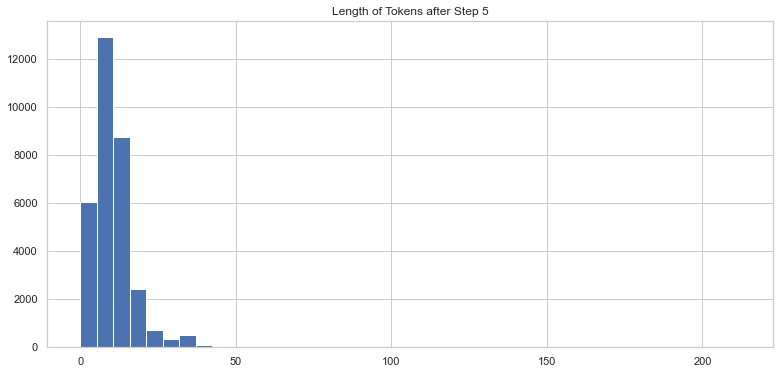

0it [00:00, ?it/s]

7. Remove all non-english Tweets. Shape is now (29881,). Clearly less than before! 
 
 Peek: 
 0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cannot, use, cause, of...
2                                    [bihday, majesty]
4                   [factsguide, society, #motivation]
5    [2/2, huge, fan, fare, big, talking, leave, ch...
Name: tweet, dtype: object


  0%|          | 0/29881 [00:00<?, ?it/s]

8. Lemmatized the tokens. Shape is still (29881,). 
 
 Peek: 
 0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, #, lyft, credit, can, not, use, cause...
2                                    [bihday, majesty]
4                 [factsguide, society, #, motivation]
5    [2/2, huge, fan, fare, big, talk, leave, chaos...
Name: tweet, dtype: object


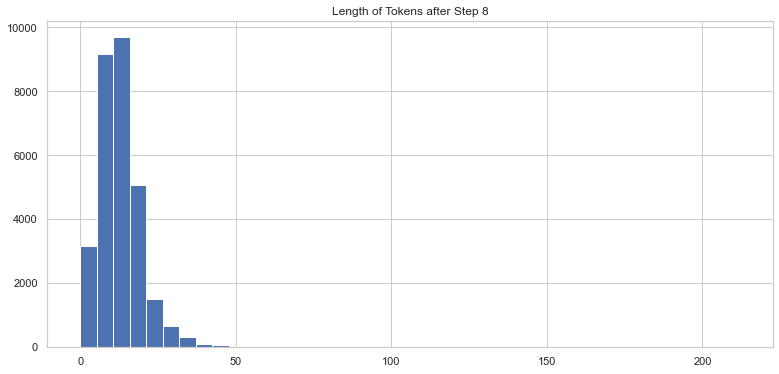

  0%|          | 0/29881 [00:00<?, ?it/s]

  0%|          | 0/29881 [00:00<?, ?it/s]

9. Removed emojis and numbers. Shape is still (29881,). 
 
 Peek: 
 0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, lyft, credit, can, not, use, cause, o...
2                                    [bihday, majesty]
4                    [factsguide, society, motivation]
5    [huge, fan, fare, big, talk, leave, chaos, pay...
Name: tweet, dtype: object


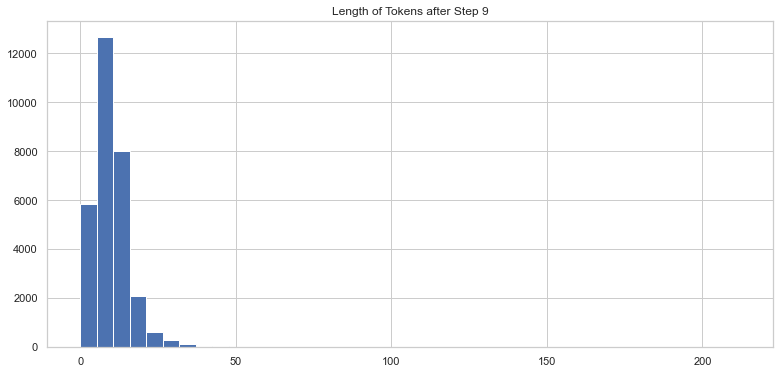

  0%|          | 0/29881 [00:00<?, ?it/s]

10. Limited each tweet to a max of 50 tokens and a min of 1 tokens. Shape is now (29617,). 
 
 Peek: 
 0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, lyft, credit, can, not, use, cause, o...
2                                    [bihday, majesty]
4                    [factsguide, society, motivation]
5    [huge, fan, fare, big, talk, leave, chaos, pay...
Name: tweet, dtype: object


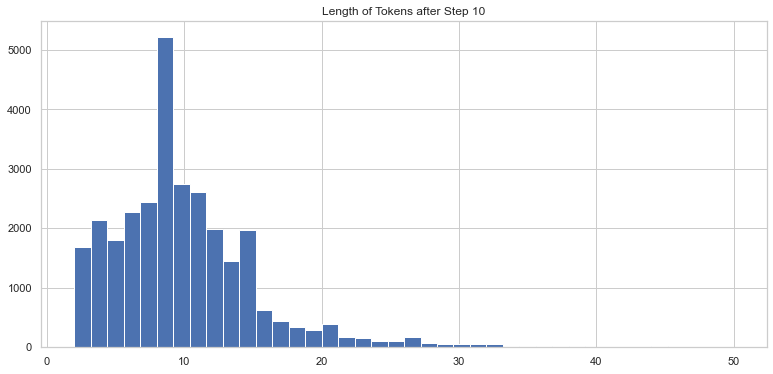

In [9]:
processed_inbound = my_tokenizer(inbound)


In [10]:
processed_inbound.head(5)

0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, lyft, credit, can, not, use, cause, o...
2                                    [bihday, majesty]
4                    [factsguide, society, motivation]
5    [huge, fan, fare, big, talk, leave, chaos, pay...
Name: tweet, dtype: object

In [11]:
real_inbound = train['tweet'].loc[processed_inbound.index]
real_outbound = train['label'].loc[processed_inbound.index]
processed = pd.DataFrame({'Processed Inbound': processed_inbound, 'Real Inbound': real_inbound,
             'Real Outbound': real_outbound})
             
processed.tail(5)

,Processed Inbound,Real Inbound,Real Outbound
31957,"[ate, isz, youuu, ð, , , , ð, , , , ð, ...",ate @user isz that youuu?ðððððð...,0
31958,"[see, nina, turner, airwave, try, wrap, mantle...",to see nina turner on the airwaves trying to...,0
31959,"[listen, sad, song, monday, morning, otw, work...",listening to sad songs on a monday morning otw...,0
31960,"[sikh, temple, vandalise, in, calgary, wso, co...","@user #sikh #temple vandalised in in #calgary,...",1
31961,"[thank, follow]",thank you @user for you follow,0


In [1]:
processed.to_pickle('objects/sentiment.pkl')
processed.to_csv('objects/sentiment.csv')

In [6]:

import tensorflow as tf
print(f"Tensorflow: {tf.__version__}")
from tensorflow import keras
print(f"Keras: {keras.__version__}")
import sklearn
print(f"Sklearn: {sklearn.__version__}")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")




import collections
import yaml
import re
import os

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

Tensorflow: 2.8.0
Keras: 2.8.0
Sklearn: 1.0.2
Pandas: 1.4.1
Numpy: 1.22.3


In [7]:
train = pd.read_pickle('objects/sentiment.pkl')
print(f'Training data: {train.head()}')

Training data:                                    Processed Inbound  \
0  [father, dysfunctional, selfish, drag, kid, dy...   
1  [thanks, lyft, credit, can, not, use, cause, o...   
2                                  [bihday, majesty]   
4                  [factsguide, society, motivation]   
5  [huge, fan, fare, big, talk, leave, chaos, pay...   

                                        Real Inbound  Real Outbound  
0   @user when a father is dysfunctional and is s...              0  
1  @user @user thanks for #lyft credit i can't us...              0  
2                                bihday your majesty              0  
4             factsguide: society now    #motivation              0  
5  [2/2] huge fan fare and big talking before the...              0  


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence


X_train, X_val, y_train, y_val = train_test_split(train['Processed Inbound'], train['Real Outbound'], test_size = 0.3, 
                                                   shuffle = True, stratify = train['Real Outbound'], random_state = 7)
print(f'\nShape checks:\nX_train: {X_train.shape} X_val: {X_val.shape}\ny_train: {y_train.shape} y_val: {y_val.shape}')


Shape checks:
X_train: (20731,) X_val: (8886,)
y_train: (20731,) y_val: (8886,)


In [9]:
X_train

1443         [brilliantly, adveising, percypigs, marshall]
7801     [write, five, time, come, conclusion, way, sou...
14315    [i, be, inane, i, be, excite, recognition, gra...
1990                            [boring, look, like, want]
11089    [another, great, day, set, pro, come, together...
                               ...                        
29132    [every, office, need, jar, quotesoftheday, fri...
17603    [never, forget, bless, negative, anon, inspira...
7898     [anyone, know, plan, race, anymore, runner, ti...
26273    [people, protest, trump, republican, won-they,...
30981    [place, ð, , , , glastonbury, abbey, glasto...
Name: Processed Inbound, Length: 20731, dtype: object

In [10]:


le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_val = le.transform(y_val)

In [11]:

t = Tokenizer()
t.fit_on_texts(X_train)

print("Document Count: \n{}\n".format(t.document_count))


def convert_to_padded(tokenizer, docs):
    ''' Taking in Keras API Tokenizer and documents and returns their padded version '''

    embedded = t.texts_to_sequences(docs)

    padded = pad_sequences(embedded, maxlen = max_length, padding = 'post')
    return padded


vocab_size = len(t.word_counts) + 1
print(f'Vocab size:\n{vocab_size}')


max_length = len(max(X_train, key = len))

print(f'Max length:\n{max_length}')

padded_X_train = convert_to_padded(tokenizer = t, docs = X_train)
padded_X_val = convert_to_padded(tokenizer = t, docs = X_val)

print(f'padded_X_train\n{padded_X_train}')
print(f'padded_X_val\n{padded_X_val}')

Document Count: 
20731

Vocab size:
27246
Max length:
50
padded_X_train
[[9914 2136 9915 ...    0    0    0]
 [ 393 1491   32 ...    0    0    0]
 [  14    8 9917 ...    0    0    0]
 ...
 [ 488   61  631 ...    0    0    0]
 [  28 1343   93 ...    0    0    0]
 [ 161    2    1 ...    0    0    0]]
padded_X_val
[[  63  526  342 ...    0    0    0]
 [  88 1366  152 ...    0    0    0]
 [ 186 8977 2931 ...    0    0    0]
 ...
 [ 125   41   21 ...    0    0    0]
 [3360  319   74 ...    0    0    0]
 [ 218   73   73 ...    0    0    0]]


In [12]:

embeddings_index = {}
f = open('objects/glove.twitter.27B.50d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

KeyboardInterrupt: 

In [ ]:

word_index = t.word_index
EMBEDDING_DIM = 50


embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
    
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix, embedding_matrix.shape

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.057841  ,  0.018137  , -1.40250003, ...,  0.34158999,
         -0.74812001, -0.29840001],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.69296002, -0.11593   ,  0.60171998, ..., -0.74050999,
         -0.006414  , -0.55796999]]),
 (27246, 50))

In [ ]:
import keras.backend as K
def get_f1(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
def make_model(vocab_size, max_token_length):
    ''' In this function I define all the layers of my neural network'''

    model = Sequential()



    model.add(Embedding(vocab_size, embedding_matrix.shape[1], input_length = 50, 
                        trainable = False, weights = [embedding_matrix]))
    
    model.add(Bidirectional(LSTM(128)))

    model.add(Dense(600, activation = "relu",kernel_regularizer ='l2'))
    

    model.add(Dense(600, activation = "relu",kernel_regularizer ='l2'))
    # model.add(Dense(600, activation = "relu",kernel_regularizer ='l2'))
    model.add(Dense(300, activation = "relu",kernel_regularizer ='l2'))
    # model.add(Dense(300, activation = "relu",kernel_regularizer ='l2'))
    model.add(Dense(150, activation = "relu",kernel_regularizer ='l2'))
    # model.add(Dense(150, activation = "relu",kernel_regularizer ='l2'))
    model.add(Dense(60, activation = "relu",kernel_regularizer ='l2'))

    model.add(Dropout(0.5))
    

    model.add(Dense(50, activation = "softmax"))
    
    return model


model = make_model(vocab_size, 50)
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            1362300   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              183296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 600)               154200    
                                                                 
 dense_1 (Dense)             (None, 600)               360600    
                                                                 
 dense_2 (Dense)             (None, 300)               180300    
                                                                 
 dense_3 (Dense)             (None, 150)               45150     
                                                        

In [1]:

filename = 'models/sentiment_classification.h5'

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_sched_checkpoint = tf.keras.callbacks.LearningRateScheduler(scheduler)


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)



checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')


hist = model.fit(padded_X_train, y_train, epochs = 20, batch_size = 32, 
                 validation_data = (padded_X_val, y_val), 
                 callbacks = [checkpoint, lr_sched_checkpoint, early_stopping])

In [ ]:

plt.figure(figsize=(10,7))
plt.plot(hist.history['val_loss'], label = 'Validation Loss', color = 'cyan')
plt.plot(hist.history['loss'], label = 'Training Loss', color = 'purple')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10,7))
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy', color = 'cyan')
plt.plot(hist.history['accuracy'], label = 'Training Accuracy', color = 'purple')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:

from keras.models import load_model
model = load_model('models/sentiment_classification.h5', compile=False)


In [14]:
def infer_sentiment(user_input):
    ''' Making a function that recieves a user input and outputs a 
    dictionary of predictions '''
    assert isinstance(user_input, str), 'User input must be a string!'
    user_input = [user_input]

    padded_text = convert_to_padded(t, user_input)
    x = padded_text[0]
    

    probs = model.predict(padded_text)

    classes = le.classes_
    

    predictions = dict(zip(classes, probs[0]))
    sorted_predictions = {k: v for k, v in sorted(predictions.items(), key=lambda item: item[1], reverse = True)}
    
    return sorted_predictions

In [15]:
X_test=[]
for i in X_val:
    temp=" ".join(i)
    X_test.append(temp)
# count=0  
# for i in X_test:
#     count+=1
#     if count==5:
#         break
#     else:
#         print(i)

In [16]:
len(X_test)

8886

In [17]:
# y_pred=infer_intent(X_val)
y_pred=map(infer_sentiment,X_test)

In [18]:
pred=list(y_pred)
for i in pred:
    print(i)
    break

{0: 0.99793774, 1: 0.0020622716}


In [19]:
for i in pred:
    t=i
    break

In [20]:
def dictchange(qwq):
    first_value = list(qwq.keys())[0]
    return(first_value)

In [21]:
y_pred=list(map(dictchange,pred))

In [22]:
X_train, X_val, y_train, y_val = train_test_split(train['Processed Inbound'], train['Real Outbound'], test_size = 0.3, 
                                                   shuffle = True, stratify = train['Real Outbound'], random_state = 7)
print(f'\nShape checks:\nX_train: {X_train.shape} X_val: {X_val.shape}\ny_train: {y_train.shape} y_val: {y_val.shape}')


Shape checks:
X_train: (20731,) X_val: (8886,)
y_train: (20731,) y_val: (8886,)


In [23]:
y_val

13364    0
28403    1
22508    0
21855    0
25635    0
        ..
11748    0
174      0
15634    1
10243    0
29734    0
Name: Real Outbound, Length: 8886, dtype: int64

In [24]:
y_true=[]
for i in y_val:
    y_true.append(i)
    

In [25]:
y_pred
for i in y_true:
    print(i)
    break

0


In [26]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [27]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
score = f1_score(y_true, y_pred, average='micro')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F-Measure: %.3f' % score)

Precision: 0.857
Recall: 0.767
F-Measure: 0.954


In [29]:
import pandas as pd
import numpy as np
import evaluation as ev
import nltk

np.set_printoptions(precision=2, linewidth=80)

In [30]:
ev.display_model_performance_metrics(true_labels=y_true, predicted_labels=y_pred, 
                                      classes=['positive', 'negative'])  

Model Performance metrics:
------------------------------
Accuracy: 0.9543
Precision: 0.9502
Recall: 0.9543
F1 Score: 0.951
